In [1]:
import datetime
print datetime.datetime.now()

2019-03-10 11:29:38.046000


In [2]:
%matplotlib inline

In [3]:
%cd C:\Users\IMPTEMP_A_PACIFIC\Desktop\Openfisca_Data\openfisca_survey_collection\

C:\Users\IMPTEMP_A_PACIFIC\Desktop\Openfisca_Data\openfisca_survey_collection


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
 df = pd.read_hdf("erfs_2013.h5", "foyer13")

In [6]:
df["_1K"] = df._1AK + df._1BK

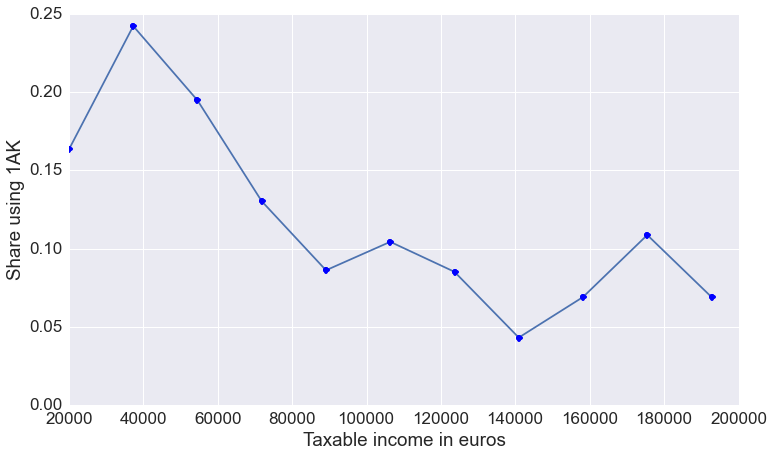

In [7]:
sns.set(font_scale = 1.7)
plt.figure(figsize = (12,7))
rbg_linspace = np.linspace(20000,210000,12)
share_not_null_list = list()
for counter in range(len(rbg_linspace)-1):
    rbg_below = rbg_linspace[counter]
    rbg_over = rbg_linspace[counter+1]
    share_not_null_list.append((df[(df.rbg>rbg_below)&(df.rbg<rbg_over)]._1K == 0).value_counts(normalize = True)[False])

    
    
    
    
plt.plot( rbg_linspace[:-1], share_not_null_list)
plt.plot( rbg_linspace[:-1], share_not_null_list, 'bo')
plt.xlabel("Taxable income in euros")
plt.ylabel("Share using 1AK")


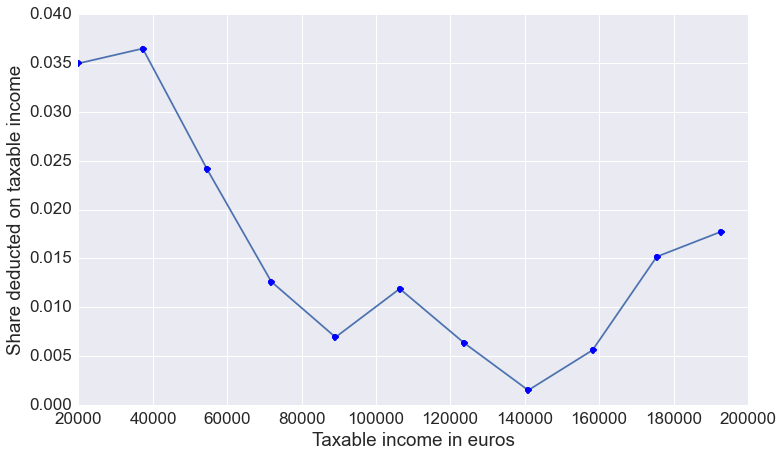

In [8]:
rbg_linspace = np.linspace(20000,210000,12)
plt.figure(figsize = (12,7))
share_deducted_list = list()
for counter in range(len(rbg_linspace)-1):
    rbg_below = rbg_linspace[counter]
    rbg_over = rbg_linspace[counter+1]
    share_deducted_list.append((df[(df.rbg>rbg_below)&(df.rbg<rbg_over)]._1K/
                               df[(df.rbg>rbg_below)&(df.rbg<rbg_over)].rbg).mean())

plt.plot(rbg_linspace[:-1], share_deducted_list)
plt.plot(rbg_linspace[:-1], share_deducted_list, "bo")

plt.xlabel("Taxable income in euros")
plt.ylabel("Share deducted on taxable income")

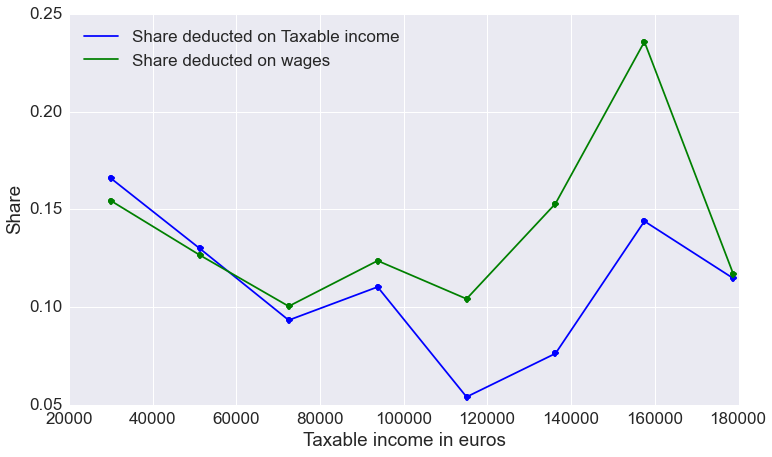

In [9]:
rbg_linspace = np.linspace(30000,200000,9)
share_deducted_Rbg_for_deductors_list = list()
share_deducted_1AJ_for_deductors_list = list()
share_deducted_1BJ_for_deductors_list = list()
share_deducted_1J_for_deductors_list = list()
for counter in range(len(rbg_linspace)-1):
    rbg_below = rbg_linspace[counter]
    rbg_over = rbg_linspace[counter+1]
    df_temp = df[(df.rbg>rbg_below)&(df.rbg<rbg_over)&(df._1K>0)]
    share_deducted_1J_for_deductors_list.append(((df_temp._1K/(df_temp._1AJ+df_temp._1BJ)).clip(0,0.9)).mean())
    share_deducted_1AJ_for_deductors_list.append(((df_temp._1K/(df_temp._1AJ)).clip(0,0.9)).mean())
    share_deducted_1BJ_for_deductors_list.append(((df_temp._1K/(df_temp._1BJ)).clip(0,0.9)).mean())
    share_deducted_Rbg_for_deductors_list.append((df_temp._1K/df_temp.rbg).mean())

plt.figure(figsize = (12,7))
plt.plot(rbg_linspace[:-1], share_deducted_Rbg_for_deductors_list,"b", label = "Share deducted on Taxable income")
plt.plot(rbg_linspace[:-1], share_deducted_Rbg_for_deductors_list, "bo")

plt.plot(rbg_linspace[:-1], share_deducted_1J_for_deductors_list,"g", label = "Share deducted on wages")
plt.plot(rbg_linspace[:-1], share_deducted_1J_for_deductors_list, "go")

plt.xlabel("Taxable income in euros")
plt.ylabel("Share")
plt.legend(loc = 2)

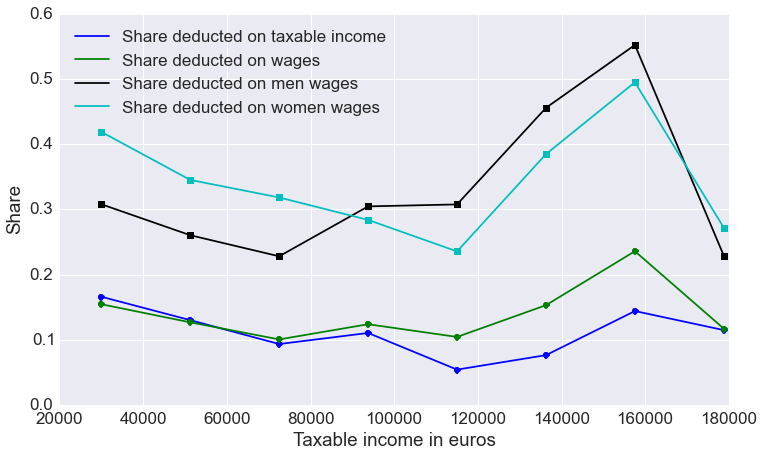

In [10]:
rbg_linspace = np.linspace(30000,200000,9)
share_deducted_Rbg_for_deductors_list = list()
share_deducted_1AJ_for_deductors_list = list()
share_deducted_1BJ_for_deductors_list = list()
share_deducted_1J_for_deductors_list = list()
for counter in range(len(rbg_linspace)-1):
    rbg_below = rbg_linspace[counter]
    rbg_over = rbg_linspace[counter+1]
    df_temp = df[(df.rbg>rbg_below)&(df.rbg<rbg_over)&(df._1K>0)]
    share_deducted_1J_for_deductors_list.append(((df_temp._1K/(df_temp._1AJ+df_temp._1BJ)).clip(0,0.9)).mean())
    share_deducted_1AJ_for_deductors_list.append(((df_temp._1K/(df_temp._1AJ)).clip(0,0.9)).mean())
    share_deducted_1BJ_for_deductors_list.append(((df_temp._1K/(df_temp._1BJ)).clip(0,0.9)).mean())
    share_deducted_Rbg_for_deductors_list.append((df_temp._1K/df_temp.rbg).mean())

plt.figure(figsize = (12,7))
plt.plot(rbg_linspace[:-1], share_deducted_Rbg_for_deductors_list,"b", label = "Share deducted on taxable income")
plt.plot(rbg_linspace[:-1], share_deducted_Rbg_for_deductors_list, "bo")

plt.plot(rbg_linspace[:-1], share_deducted_1J_for_deductors_list,"g", label = "Share deducted on wages")
plt.plot(rbg_linspace[:-1], share_deducted_1J_for_deductors_list, "go")


plt.plot(rbg_linspace[:-1], share_deducted_1AJ_for_deductors_list,"k", label = "Share deducted on men wages")
plt.plot(rbg_linspace[:-1], share_deducted_1AJ_for_deductors_list, "ks")

plt.plot(rbg_linspace[:-1], share_deducted_1BJ_for_deductors_list,"c", label = "Share deducted on women wages")
plt.plot(rbg_linspace[:-1], share_deducted_1BJ_for_deductors_list, "cs")



plt.xlabel("Taxable income in euros")
plt.ylabel("Share")
plt.legend(loc = 2)

In [11]:
print datetime.datetime.now()

2019-03-10 11:29:56.614000
